# Welcome to Week 3: Linked List & complexity

In this week's programming exercise, you will be working on implementing various linked list classes in Python, coding various algorithms, and checking if you can notice the difference in complexity. Throughout the exercise, you will be extending the classes by completing code stubs in their respective cells. You do not need to copy the code, it is enough to work in the cell under each exercise. Note that there are separate cells provided where you can (and should) test your code. During the exercises, you will (through customMagics) obtain a Python file (.py) which you should run against a set of unittests. Please avoid writing any unnecessary code in cells containing the `%%execwritefile` command. Doing this could alter the file `.py` and make it syntactically incorrect or interfere with the unittests. To prevent this stick to the following rules:'
 - ***Do not remove cells that start with ``%%execwritefile`` and do not remove that line.***
 - If a cell contains a `%%execwritefile` command at the top and a class definition you need to complete the given methods and adding helper methods is allowed, but do **not** add new functions or Python script to the cells (like global variables).
 - If a cell contains a `%%execwritefile` command at the top and **not** a class definition you must complete the given functions and you are free to add helper functions, new classes, and Python script that contains for example global variables. Note, that the use of global variables is almost always wrong except for a few use cases such as RNG for the numpy random generator methods.
 - If a cell does **not** contain a `%%execwritefile` command you can plot things, print variables, and write test cases. Here, you are free to do whatever you want.
 - If a cell does **not** contain a `%%execwritefile` command it should not contain functional code that is needed to run other functions or classes. The reason is that it is not copied to the `.py`. So, it can not be used during the unittesting.

You do not need to look at the `customMagic.py` nor do more than glimpse at the test file, your exercise is contained in this workbook unless specified differently in this notebook's instructions. 

This exercise is given as a Jupyter notebook, you might run this in your browser by starting a notebook server or through VScode (PyCharm only allows for read-only mode for jupyter notebooks, unless you have Pycharm-pro which is a paid version or you need a student license). The simplest way to [install jupyter](https://docs.jupyter.org/en/latest/install/notebook-classic.html) notebooks is by installing [Anaconda](https://docs.anaconda.com/free/anaconda/install/), a custom python distribution and packagemanager used for Data Science. If you do not want to install all of Anaconda you can also install jupyter via pip: ``pip3 install jupyter`` (`pip3` or `pip` will work depending on how you installed python3). You can find a tutorial for running the notebook [here](https://jupyter-notebook.readthedocs.io/en/latest/notebook.html). With VScode the IDE should guide you in installing the correct packages. 

***Hint: Jupyter Notebooks saves variables between runs. If you get unexpected results try restarting the kernel, this deletes any saved variables.*** 

Please fill in your student name down below

In [1]:
# FILL IN YOU STUDENT NUMBER
student = 3893995

# Show binary search tree in performance demo
ADD_TREE_TO_DEMO = False

# Set this to false if you want the default screen width.
WIDE_SCREEN = True

### ***IMPORTANT, add the exercise2_{studentnummer}.py file from last week to the same folder as this notebook or set ADD_TREE_TO_DEMO on False!***

In [2]:
from custommagics import CustomMagics
import timeit
import matplotlib.pyplot as plt

if ADD_TREE_TO_DEMO:
    try:
        # import your code from last week
        m = __import__(f"exercise2_{student}")
    except ModuleNotFoundError:
        raise ModuleNotFoundError(f"exercise2_{student}.py was not found! \
    Please make sure that you put this file in the same folder as this notebook.")
    else:
        # find all imports, either with __all__ or dir
        try:
            attrlist = m.__all__
        except AttributeError:
            attrlist = dir(m)
        
        # Add all your code from last to this namespace, i.e., you can now use BinarySearchTree as if you wrote it in this file. 
        for attr in attrlist:
            if attr[:2] != "__":
                globals()[attr] = getattr(m, attr)

if WIDE_SCREEN:
    import notebook
    from IPython.display import display, HTML

    if int(notebook.__version__.split(".")[0]) >= 7:    
        display(HTML(
            '<style>'
                '.jp-Notebook { padding-left: 1% !important; padding-right: 1% !important; width:100% !important; } '
            '</style>'
        ))
    else:
        display(HTML("<style>.container { width:98% !important; }</style>"))

get_ipython().register_magics(CustomMagics)



In [3]:
%%execwritefile exercise3_{student}_notebook.py 0 

# DO NOT CHANGE THIS CELL.
# THESE ARE THE ONLY IMPORTS YOU ARE ALLOWED TO USE:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

RNG = np.random.default_rng()

Writing exercise3_3893995_notebook.py


In [4]:
plt.matplotlib.rcParams['figure.figsize'] = [8, 3]

# A Quick Pedagogical Note

In this exercise, we will implement our own list datastructures and while this gives a good idea of how they work you should not use them when normally programming in Python. You should use the dedicated Python datastructures. For a general list implementation, you can just use `list()` and otherwise there is often a fast implementation for specific datastructures such as queues.

# Inheritance 

*This paragraph is not needed to make the exercises but without it some parts can feel like magic.*

In this exercise, we will actively use inheritance to make our classes. However, don't worry you do not need to use it yourself and we will only use it to reduce the amount of code we need to write. So, to simplify it a bit you can see inheritance as a coping-pasting code from one class to the other. To be able to do this exercise you need to understand the following things about inheritance:
 1. To use inheritance you put the class you want to copy-paste to the new class inside the brackets. For example `class Queue(LinkedList): ...`, here all the content of the `LinkedList` class is copied to `Queue`. Again, this is done for you during this exercise. You can see inheritance as a tree, where all code from nodes above the current node is copied to the current node. In other words, all code from classes higher up in the tree is inherited by this class. 
 2. Each class can only have one method with the same name, thus if you use the same name for a method twice in a class the first instance of the method will be overwritten by the second. This works the same for inheritance, if `LinkedList` contains a method `pop` and you use the same method name `pop` in `Queue` then the `pop` method defined in `Queue` will overwrite it. Note, that in `LinkedList` `pop` is not overwritten as that class does not "see" the `Queue` class as it sits higher in the tree. Again, all methods that need to be redefined are given. you only need to understand that you can use methods of the class that you inherit from.
 3. To add even more flexibility, you can overwrite a method in your new class but copy the code from the old method into the new method. This is done with `super({class_name}, self).{method_you_want_to_copy}(arguments)`. This copies all code from the "method_you_want_to_copy" into the new method (usually with the same name). Again, you do not need yo use it your self, but you need to understand what it does if you see it.

Let's go through some examples of why we need this behavior and why it is useful:
 1. A double-linked list is the same as a linked list but with some extras, therefore it makes sense to copy everything from the linked list implementation to the double-linked list implementation and only overwrite some methods. Thus the first point is very useful.
 2. Now let's look at a specific method in the classes linked list and double linked list. Let's say we have a nice `__repr__` method to visualize a linked list. Then instead of copy-pasting this `__repr__` method to each class, we can use inheritance to do this for us. This has also the added benefit of making the code DRY because now you either have a correct implementation of `__repr__` or you don't. Compared to not using inheritance where each class can be correct or incorrect independently of each other.
 3. Sometimes a method for two classes is the same but one class needs a bit more code. Again, a linked list has only a start node while a double-linked list has a start and end node. So, you can use the following code:

```
class LinkedList():
    def __init__(self, start):
        self.start = start

class DoubleLinkedList(LinkedList):
    def __init__(self, start, end):
        super(DoubleLinkedList).__init__(start)  # This would be similar to just typing "self.start = start".
        self.end = end
```

# 1.0 Nodes/Links

The following code outlines the stub of a `Link` class and a `DLink` class. Study how these classes work and ensure you thoroughly study the docstrings to get a clear idea of how the class ought to be implemented. This `Link` class is the basis for all single-linked lists and the `DLink` class is used for double-linked lists.

For both classes implement the `__repr__` method to be able to debug your code. This is useful when, for example, if you later search for a value you can print this "node" in a way that you understand the print. There is no format that you need to adhere to nor is this mandatory. However, it is rather useful as the alternative would be printing attributes of node objects which takes more time.

While you could implement the `__repr__` method for both classes separately, we could also use inheritance where the DLink class uses the `__repr__` of the `Link` class. Below, you can find the framework to use inheritance.

In [5]:
%%execwritefile exercise3_{student}_notebook.py 10 -a -s

class Link():
    """
    This class creates a node that can be used to build any kind of linked list.
    Note, that we called it Link to distinguish this class from the DLink class
    which is used as nodes for double-linked lists.
    
    Attributes:
        :param self.info: The value of the node.
        :type self.info: int
        :param self.next: The next node in the linked list, defaults to None.
        :type self.next: List, optional 
    """
    def __init__(self, info, next=None):
        self.info = info
        self.next = next

    def __repr__(self):
        """
        This returns a representation of a Link object.

        :return: A string representing the Link object.
        :rtype: str
        """
        # Change this to anything you like, such that you can easily print a Node object.
        return super(Link, self).__repr__() 

class DLink(Link):
    """
    This class creates a node that can be used to build any kind of double-linked list.
    Note, that we called it DLink to distinguish this class from the Link class
    which is used as nodes for linked lists.
    
    Attributes:
        :param self.info: The value of the node. (inherited)
        :type self.info: int
        :param self.next: The next node in the double-linked list, defaults to None. (inherited)
        :type self.next: DList, optional 
        :param self.prev: The previous node in the double-linked list, defaults to None.
        :type self.prev: DList, optional         
    """
    def __init__(self, info, previous=None, next=None):
        super(DLink, self).__init__(info, next)  # Inherrit the init method of Link. You can think of this as copy-pasting the link init here.
        self.prev = previous

Appending to exercise3_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand) to validate if `__repr__` works as you intended.
You can do this by creating a `(D)Link` object and printing it.

In [6]:
Link(10), DLink(10)

(<__main__.Link object at 0x73172c112890>,
 <__main__.DLink object at 0x731723f4de90>)

# 2.0 Basic Linked Lists

Here, we will implement a general single-linked list and a general double-linked list. Study how these classes work and ensure you thoroughly study the docstrings to get a clear idea of how the class ought to be implemented. 

Also, implement the `__repr__` method. Here, the `__repr__` method must be a list of the `Link` Representations. So, assuming that the `Link` representation is just the `info` of the object. Then a `BasicLinkedList` with the nodes representing the numbers 5,3,8 should be printed as: `[5, 3, 8]`, where each representation of the `BasicLinkedList` starts and ends with a square bracket, and each `Link` representation is separated by a comma and space like this: `, `.  Make sure you follow these rules precisely otherwise the autograder will not give you any points. An empty list should be represented as `[]`. In other words, your representation of your linked list should be the same as the representation of the default Python list.

Due to inheritance, the `BasicDLinkedList` class should have the same `__repr__` as the `BasicLinkedList` class.

In [7]:
%%execwritefile exercise3_{student}_notebook.py 20 -a -s

class BasicLinkedList():
    """
    This class creates linked list objects.
    The most basic implementation of a linked list stores 
    only the start of the list and nothing else.
    This is what we will use during this exercise.
    
    This means that you can only access the start node directly, 
    while other nodes can be accessed through the start node. 

    Attributes:
        :param self.start: The start node of the single-linked list, defaults to None.
        :type self.start: Link, optional
    """
    def __init__(self, start=None):
        """
        This initializes a single linked list object.
        Note, that this creates by default an empty list.
        """
        self.start = start
        
    def __repr__(self):
        """
        This returns a representation of a LinkedList object.

        :return: A string representing the LinkedList object.
        :rtype: str
        """
        if self.start is None:
            return "[]"
        else:
            result = "["
            current = self.start
            while current is not None:
                result += f"{current.info}, "
                current = current.next
            result = result.rstrip(", ") + "]"
            return result

class BasicDLinkedList(BasicLinkedList):
    """
    This class creates double-linked list objects.
    A double-linked list stores both the start and end of a list.
    This is what we will use during this exercise.
    
    This means that you can only access the start and end node directly, 
    while other nodes can be accessed through either the start node or the end node. 

    Note, that this class uses DLink objects and note Link objects.
    
    Attributes:
        :param self.start: The start node of the double-linked list, defaults to None.
        :type self.start: DLink, optional
        :param self.end: The end node of the double-linked list, defaults to None.
        :type self.end: DLink, optional
    """
    
    def __init__(self, start=None, end=None):
        """
        This initializes a basic double-linked list object.
        Note, that this creates by default an empty list.
        """
        super(BasicDLinkedList, self).__init__(start)  # Inherrit the init method of Link. You can think of this as copy-pasting the link init here.
        if end is None:
            self.end = start
        else:
            self.end = end

Appending to exercise3_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand) to validate if `__repr__` works as intended.
You can do this by creating a `BasicLinkedList` or `BasicDLinkedList` object and printing it.

In [8]:
# Note, that the third print uses the double linked list and not the single
BasicLinkedList(Link(10)), BasicLinkedList(), BasicDLinkedList(Link(10, Link(5)))

([10], [], [10, 5])

## 3.0 Queues using Single-Linked Lists (pop \& append)

Here, we will make a queue that uses a single-linked list `QueueSingle` which has the same `__repr__` and `__init__` as `BasicLinkedList` but also has `pop` and `append` to complete the functionality of a queue. Study how this class works and ensure you thoroughly study the docstrings to get a clear idea of how the class ought to be implemented.

In [9]:
%%execwritefile exercise3_{student}_notebook.py 21 -a -s

class QueueSingle(BasicLinkedList):
    """
    This class has the same attributes, initialization, and representation as the BasicLinkedList.
    """
    def pop(self):
        """
        This method removes the first element in the queue and returns it.
        
        If the list is empty raise the following error "IndexError: pop from empty list."
        You can do this with "raise IndexError(message)"

        :return: This returns the info of the first link in the linked list.
        :rtype: int
        """
        if self.start is None:
            raise IndexError("pop from empty list")
        else:
            first_info = self.start.info
            self.start = self.start.next
            return first_info

    def append(self, value):
        """
        This method adds a new element to the queue.
        In a queue, an element is always placed at the end of the linked list.

        :param value: This is the value that needs to be added to the linked list.
        :type value: int
        """
        new_link = Link(value)
        if self.start is None:
            self.start = new_link
        else:
            current = self.start
            while current.next is not None:
                current = current.next
            current.next = new_link         

Appending to exercise3_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand). Here, you can validate if pop and append are correctly implemented. You can do this by creating a `QueueSingle` object, adding and removing nodes, and printing it. Below, you can find a minimal example.

In [10]:
q = QueueSingle()
for i in [5,3,8]:
    q.append(i)
q

[5, 3, 8]

## 3.1 Queue

Here, we will implement a queue datastructure that uses a double-linked list (more traditional). Study how the class `Queue` works and ensure you thoroughly study the docstrings to get a clear idea of how the class ought to be implemented. 

This `Queue` class uses the basic double-linked list implementation with additionally the methods `pop` and `append`. Therefore, we use inheritance using the class `BasicDLinkedList`.

In [11]:
%%execwritefile exercise3_{student}_notebook.py 30 -a -s

class Queue(BasicDLinkedList):
    """
    This class has the same attributes, initialization, and representation as the BasicDLinkedList.
    """
    def pop(self):
        """
        This method removes the first element in the queue and returns it.
        
        If the list is empty raise the following error "IndexError: pop from empty list."
        You can do this with "raise IndexError(message)"

        :return: This returns the info of the first link in the linked list.
        :rtype: int
        """
        if self.start is None:
            raise IndexError("pop from empty list")
        else:
            first_info = self.start.info
            self.start = self.start.next
            if self.start is None:
                self.end = None
            return first_info

    def append(self, value):
        """
        This method adds a new element to the queue.
        In a queue, an element is always placed at the end of the linked list.

        :param value: This is the value that needs to be added to the queue.
        :type value: int
        """
        new_link = DLink(value, previous=self.end)
        if self.start is None:
            self.start = new_link
            self.end = new_link
        else:
            self.end.next = new_link
            self.end = new_link

Appending to exercise3_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand). Here, you can validate if `pop` and `append` are correctly implemented. You can do this by creating a `QueueSingle` object, adding and removing nodes, and printing it. Below, you can find a minimal example.

In [12]:
q = Queue()
for i in [5,3,8]:
    q.append(i)
print(q)

[5, 3, 8]


## 3.2 Queue vs QueueSingle (speed test)

If you compare `Queue` and `QueueSingle`, you can see that `Queue` is a bit more difficult and needs more specific operations. However, if you compare the Big-O notation of the `pop` and `append` methods you can see a difference that would make one of the classes significantly faster. ***Make sure you do the theory question about queues implemented with single-linked list vs double-linked list before you continue.***

Below, you can find a demo to see the results for the time it takes to either append or pop one node given that the queue contains 0 to $n$ items. You can also see the total time it takes to either pop or append $n$ items. In the demo, you can either show the results in log-log scale or linear scale ("normal" scale). The log-log scale shows the difference between the tests better, but the linear scale shows the complexity better. 

Hint: In log-log scale, a line that is twice as steep is increasing quadratic in linear scale. See below for an example.

In [13]:
SHOW_LOG_SCALE = True

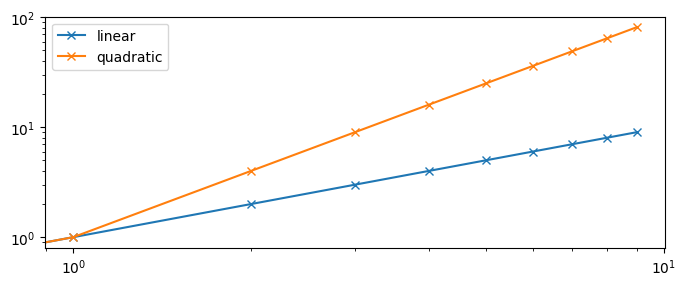

In [14]:
plt.plot(np.arange(10), np.arange(10), linestyle='-', marker='x', label="linear")
plt.plot(np.arange(10), np.arange(10)**2, linestyle='-', marker='x', label="quadratic")
if SHOW_LOG_SCALE:
    plt.xscale("log")
    plt.yscale("log")
plt.legend()
plt.show()

Starting measuring performance ...
busy timing size 1...
busy timing size 3...
busy timing size 10...
busy timing size 31...
busy timing size 100...
busy timing size 316...
busy timing size 1000...
busy timing size 3162...
busy timing size 10000...


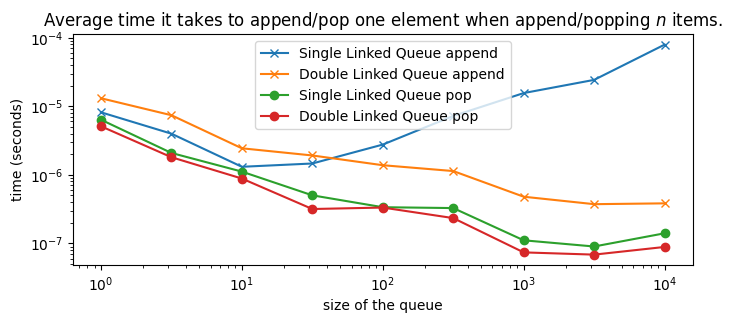

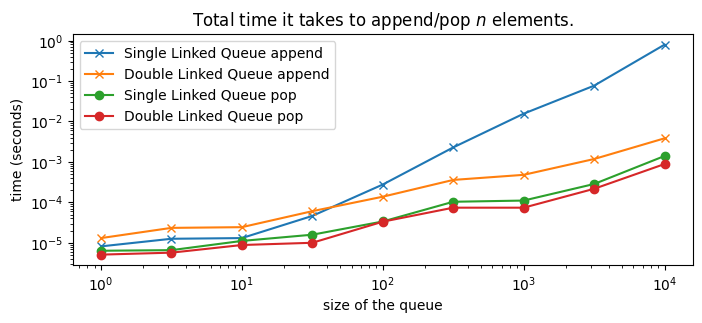

In [15]:
def speed_test_append(q, n):
    for i in range(n):
        q.append(i)
    return q

def speed_test_pop(q, n):
    for _ in range(n):
        q.pop()


print("Starting measuring performance ...")
q_s_a, q_d_a, q_s_p, q_d_p = [], [], [], []

sizes = 10**np.arange(0, 4.5, 0.5)
for n in sizes:
    n = int(n)
    print(f"busy timing size {n}...")
    q_s_a.append(min(timeit.repeat(f"speed_test_append(q, {n})",
                  setup="from __main__ import speed_test_append \nq = Queue()",
                  globals={"Queue":QueueSingle},
                  number=1,
                  repeat=1))/n)
    q_d_a.append(min(timeit.repeat(f"speed_test_append(q, {n})",
                  setup="from __main__ import speed_test_append \nq = Queue()",
                  globals={"Queue":Queue},
                  number=1,
                  repeat=1))/n)
    q_s_p.append(min(timeit.repeat(f"speed_test_pop(q, {n})",
                  setup=f"from __main__ import speed_test_pop,speed_test_append \nq = speed_test_append(Queue(), {n})",
                  globals={"Queue":QueueSingle},
                  number=1,
                  repeat=1))/n)
    q_d_p.append(min(timeit.repeat(f"speed_test_pop(q, {n})",
                  setup=f"from __main__ import speed_test_pop,speed_test_append \nq = speed_test_append(Queue(), {n})",
                  globals={"Queue":Queue},
                  number=1,
                  repeat=1))/n)

plt.title("Average time it takes to append/pop one element when append/popping $n$ items.")
plt.plot(sizes, q_s_a, linestyle='-', marker='x', label="Single Linked Queue append")
plt.plot(sizes, q_d_a, linestyle='-', marker='x', label="Double Linked Queue append")
plt.plot(sizes, q_s_p, linestyle='-', marker='o', label="Single Linked Queue pop")
plt.plot(sizes, q_d_p, linestyle='-', marker='o', label="Double Linked Queue pop")
if SHOW_LOG_SCALE:
    plt.xscale("log")
    plt.yscale("log")
plt.xlabel("size of the queue")
plt.ylabel("time (seconds)")
plt.legend()
plt.show()

plt.title("Total time it takes to append/pop $n$ elements.")
plt.plot(sizes, q_s_a*sizes, linestyle='-', marker='x', label="Single Linked Queue append")
plt.plot(sizes, q_d_a*sizes, linestyle='-', marker='x', label="Double Linked Queue append")
plt.plot(sizes, q_s_p*sizes, linestyle='-', marker='o', label="Single Linked Queue pop")
plt.plot(sizes, q_d_p*sizes, linestyle='-', marker='o', label="Double Linked Queue pop")
if SHOW_LOG_SCALE:
    plt.xscale("log")
    plt.yscale("log")
plt.xlabel("size of the queue")
plt.ylabel("time (seconds)")
plt.legend()
plt.show()

# 4.0 Search Complexity

So far we have demonstrated, that choosing the right datastructure matters in terms of speed due to complexity. Often, a specific datastructure allows for a faster algorithm or even better complexity. In this part of the exercise, we will look at search complexity and speed. Below, you will implement a search algorithm for single and double-linked lists. We will also compare it to the binary search tree of last week and a native Python set. 

## 4.1 Single-Linked List

Below, we will implement a `SingleLinkedList` class that inherits the `BasicLinkedList` class for the `__init__` and `__repr__`. You have to add the basic functionality `pop` and `insert` to the class by writing the methods `insert`, and `pop`. `pop` and `insert` work differently for a single-linked list compared to a queue (`pop` and `append`) because you can `pop` and `insert` values at any position in the list. 

In [18]:
%%execwritefile exercise3_{student}_notebook.py 40 -a -s

class SingleLinkedList(BasicLinkedList):
    def pop(self, n):
        """
        This method removes the nth element in the list and returns it.
        
        If the list is empty raise the following error "IndexError: pop from empty list".
        You can do this with "raise IndexError(message)".

        If the value of n is greater than or equal to the length of the list 
        raise the following error "IndexError: pop index out of range".
        Again, You can do this with "raise IndexError(message)".

        :param n: This value determines which Link info is returned and which Link needs to be removed.
        :type n: int
        :return: This returns the info of the nth link in the linked list.
        :rtype: int
        """
        if self.start is None:
            raise IndexError("pop from empty list")
        
        if n < 0:
            raise IndexError("pop index out of range")
        
        if n == 0:
            return_value = self.start.info
            self.start = self.start.next
            return return_value
        
        current = self.start
        for i in range(n - 1):
            if current.next is None:
                raise IndexError("pop index out of range")
            current = current.next
        
        return_value = current.next.info
        current.next = current.next.next
        return return_value
        
    def insert(self, value, n):
        """
        This method inserts at the nth element in the list a new value.
        This means that all other values are essentially pushed one index ahead. 
        This is a consequence of inserting a value in the "middle" of the list.
     
        If the value of n is greater than the length of the list,
        you need to insert the value at the end of the list.

        :param value: This is the value that needs to be added to the linked list.
        :type value: int
        :param n: This value determines where the new value needs to be inserted.
        :type n: int
        """
        new_link = Link(value)
        if self.start is None:
            self.start = new_link
            return
        
        if n <= 0:
            new_link.next = self.start
            self.start = new_link
            return
        
        current = self.start
        for _ in range(n - 1):
            if current.next is None:
                break
            current = current.next
        
        new_link.next = current.next
        current.next = new_link

Replace existing code exercise3_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand). Here, you can validate if `pop` and `insert` are correctly implemented. You can do this by creating a `SingleLinkedList` object, adding nodes, removing nodes, and printing the list. Below, you can find a minimal example.

In [19]:
list_ = SingleLinkedList()
for i in [5,3,8]:
    list_.insert(i, 0)
print(list_)

for _ in range(3):
    print(list_.pop(0))

[8, 3, 5]
8
3
5


## 4.2 Single-Linked List Search

Below, we will complete the class `SingleLinkedList` by adding the method `search`. The search algorithm you need to implement is a very basic loop over all values in the list and if the list contains the value return `True` else return `False`.

In [20]:
%%execwritefile exercise3_{student}_notebook.py 41 -a -s -c

class SingleLinkedList(SingleLinkedList):
    def search(self, value):
        """
        This method is a basic search method to check if a value is in the list.
        If the value is in the list return True otherwise return False.

        :param value: This is the value that is searched for.
        :type value: int
        :return: A boolean is returned containing the answer if the search was successful.
        :rtype: boolean
        """
        current = self.start
        while current is not None:
            if current.info == value:
                return True
            current = current.next
        return False

Appending to exercise3_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand). Here, you can validate if `search` is correctly implemented. You can do this by creating a `SingleLinkedList` object, adding nodes, and searching for certain values in the list. Below, you can find a minimal example.

In [21]:
list_ = SingleLinkedList()
for i in [5,3,8]:
    list_.insert(i, 0)
print(list_.search(3))


True


## 4.3 Double-Linked List

Below, we will implement a `DoubleLinkedList` class that inherits the `BasicDLinkedList` class for the `__init__` and `__repr__`. You have to add the basic functionality `pop` and `insert` to the class by writing the methods `insert`, and `pop`. `pop` and `insert` work differently for a double-linked list compared to a queue (`pop` and `append`) because you can `pop` and `insert` values at any position in the list. 

Also, note that with a double-linked list the algorithms are a bit different than compared to a single-linked list as you do not have to update both what the previous `Link` was and the current.

In [22]:
%%execwritefile exercise3_{student}_notebook.py 45 -a -s

class DoubleLinkedList(BasicDLinkedList):
    def pop(self, n):
        """
        This method removes the nth element in the list and returns it.
        
        If the list is empty raise the following error "IndexError: pop from empty list".
        You can do this with "raise IndexError(message)".

        If the value of n is greater than or equal to the length of the list 
        raise the following error "IndexError: pop index out of range".
        Again, You can do this with "raise IndexError(message)".

        :param n: This value determines which DLink info is returned and which DLink needs to be removed.
        :type n: int
        :return: This returns the info of the nth link in the double-linked list.
        :rtype: int
        """
        if self.start is None:
            raise IndexError("pop from empty list")
        
        if n < 0:
            raise IndexError("pop index out of range")
        
        if n == 0:
            return_value = self.start.info
            self.start = self.start.next
            if self.start is not None:
                self.start.prev = None
            return return_value
        
        current = self.start
        for i in range(n):
            if current.next is None:
                raise IndexError("pop index out of range")
            current = current.next
        
        return_value = current.info
        current.prev.next = current.next
        if current.next is not None:
            current.next.prev = current.prev
        return return_value
           
    def insert(self, value, n):
        """
        This method inserts at the nth element in the list a new value.
        This means that all other values are essentially pushed one index ahead. 
        This is a consequence of inserting a value in the "middle" of the list.
     
        If the value of n is greater than the length of the list,
        you need to insert the value at the end of the list.

        :param value: This is the value that needs to be added to the double-linked list.
        :type value: int
        :param n: This value determines where the new value needs to be inserted.
        :type n: int
        """
        new_link = DLink(value)
        if self.start is None:
            self.start = new_link
            return
        
        if n <= 0:
            new_link.next = self.start
            self.start.prev = new_link
            self.start = new_link
            return
        
        current = self.start
        for _ in range(n - 1):
            if current.next is None:
                break
            current = current.next
        
        new_link.prev = current
        new_link.next = current.next
        if current.next is not None:
            current.next.prev = new_link
        current.next = new_link

Appending to exercise3_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand). Here, you can validate if `pop` and `insert` are correctly implemented. You can do this by creating a `DoubleLinkedList` object, adding nodes, removing nodes, and printing the list. Below, you can find a minimal example.

In [23]:
list_ = DoubleLinkedList()
for i in [5,3,8]:
    list_.insert(i, 0)
print(list_)

for _ in range(3):
    print(list_.pop(0))

[8, 3, 5]
8
3
5


## 4.4 Double-Linked List Search

Below, we will complete the class `DoubleLinkedList` by adding the method `search`. For a double-linked list the search algorithm is not as trivial as for a single-linked list because you have the option to search from the front of the list and from the back. 

In this exercise, you are free to any algorithm you like (somehow looping through the list is good enough). Is looping through the list from the back to the front faster then the search algorithm of the linked list? Can you make it somehow faster and think about if the complexity changes with these improvements or not? Later you can test if your algorithm is indeed faster than the single linked list search algorithm. Note, that this does not necessarily mean that the complexity is different.

In [24]:
%%execwritefile exercise3_{student}_notebook.py 46 -a -s -c

class DoubleLinkedList(DoubleLinkedList):
    def search(self, value):
        """
        This method is a basic search method to check if a value is in the list.
        If the value is in the list return True otherwise return False.

        :param value: This is the value that is searched for.
        :type value: int
        :return: A boolean is returned containing the answer if the search was successful.
        :rtype: boolean
        """
        current = self.start
        while current is not None:
            if current.info == value:
                return True
            current = current.next
        return False

Appending to exercise3_3893995_notebook.py


## Test your code

In the cell below you can test your code from the cell above (ensure you run the cell beforehand). Here, you can validate if `search` is correctly implemented. You can do this by creating a `DoubleLinkedList` object, adding nodes, and searching for certain values in the list. Below, you can find a minimal example.

In [25]:
list_ = DoubleLinkedList()
for i in [5,3,8]:
    list_.insert(i, 0)
print(list_.search(8))


True


## 4.5 Search (speed test)

Now that you have implemented 2 search algorithms in this lab and 1 in the previous lab, we can compare them in terms of speed and see how the complexity of each algorithm impacts the speeds when increasing the data size. Also, to give a hint on why set or dictionaries are good to use we will compare the search speeds in a set as well. Think about what the complexity of a search algorithm of a set could be. ***Make sure you do the theory question about search algorithms before running the demo!*** 

Note, that the binary search tree you implemented last week is not balanced. In this demo, we assume that it is by inserting values in an order that guarantees a balanced tree. Think about how this affects the complexity of the search algorithm. *As a side note, you can have a look at `fill_tree` how such balanced tree is made*.

Below, you can find a demo to see the results for the average time it takes to search for an item if the datastructure contains $n$ items. In the demo, you can either show the results in log-log scale or linear scale ("normal" scale). The log-log scale shows the difference between the tests better, but the linear scale shows the complexity better. 

Hint: In log-log scale, a line that is twice as steep is increasing quadratic in linear scale. See the example in [3.2 Queue vs QueueSingle (speed test)](#3.2-Queue-vs-QueueSingle-(speed-test)). 

In [26]:
SHOW_LOG_SCALE = True

Starting measuring performance ...
busy timing size 1...
busy timing size 3...
busy timing size 10...
busy timing size 31...
busy timing size 100...
busy timing size 316...
busy timing size 1000...
busy timing size 3162...
busy timing size 10000...


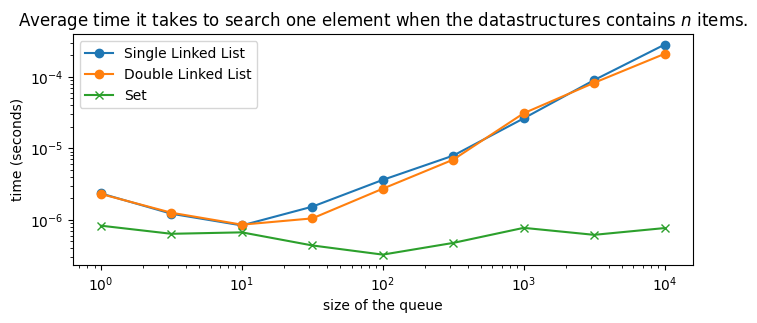

In [27]:
def fill_list(list_, numbers):
    for n in numbers:
        list_.insert(n, 0)

def fill_tree(tree, numbers):
    if not len(numbers):
        return
        
    mid = len(numbers) // 2
    tree.add(numbers[mid])
    fill_tree(tree, numbers[:mid])
    fill_tree(tree, numbers[mid+1:])

print("Starting measuring performance ...")
slist, dlist, sets, trees = [], [], [], []

sizes = 10**np.arange(0, 4.5, 0.5)
for n in sizes:
    n = int(n)
    print(f"busy timing size {n}...")
    # numbers to be added to the datastructures
    numbers = RNG.choice(list(range(n*10)), size=n, replace=False)

    slist.append(np.mean(timeit.repeat(f"list_.search(value)",
                  setup=f"from __main__ import SingleLinkedList, fill_list \nlist_ = SingleLinkedList() \nfill_list(list_, numbers) \nvalue = RNG.choice(numbers)",
                  globals={"numbers":numbers, "RNG":RNG},
                  number=1,
                  repeat=100)))
    dlist.append(np.mean(timeit.repeat(f"list_.search(value)",
                  setup=f"from __main__ import DoubleLinkedList, fill_list \nlist_ = DoubleLinkedList() \nfill_list(list_, numbers) \nvalue = RNG.choice(numbers)",
                  globals={"numbers":numbers, "RNG":RNG},
                  number=1,
                  repeat=100)))
    sets.append(np.mean(timeit.repeat(f"value in sets",
                  setup=f"sets = set(numbers) \nvalue = RNG.choice(numbers)",
                  globals={"numbers":numbers, "RNG":RNG},
                  number=1,
                  repeat=100)))
    if ADD_TREE_TO_DEMO:
        trees.append(np.mean(timeit.repeat(f"tree.search(value)",
                      setup=f"from __main__ import BinarySearchTree, fill_tree \ntree = BinarySearchTree() \nfill_tree(tree, sorted(numbers)) \nvalue = RNG.choice(numbers)",
                      globals={"numbers":numbers, "RNG":RNG},
                      number=1,
                      repeat=100)))

plt.title("Average time it takes to search one element when the datastructures contains $n$ items.")
plt.plot(sizes, slist, linestyle='-', marker='o', label="Single Linked List")
plt.plot(sizes, dlist, linestyle='-', marker='o', label="Double Linked List")
plt.plot(sizes, sets, linestyle='-', marker='x', label="Set")
if ADD_TREE_TO_DEMO:
    plt.plot(sizes, trees, linestyle='-', marker='x', label="Binary Search Tree")
if SHOW_LOG_SCALE:
    plt.xscale("log")
    plt.yscale("log")
plt.xlabel("size of the queue")
plt.ylabel("time (seconds)")
plt.legend()
plt.show()


# 5.0 UNITTESTS

During this assignment, we copied all your code to the following **.py** file **"exercise3_{student}_notebook.py"**. You also tested your code along the way. However, it is possible that there are still a few errors. Therefore, it is good to run some unittest when you complete all coding. This gives you an extra chance to spot mistakes. Here, we added some unittest for you to use. Note, that they are merely a check to see if your **.py** is correct.

From this point onwards we strongly advise renaming the **"exercise3_{student}_notebook.py"** file to the correct file name that you need to hand in **"exercise3_{student}.py"**. Now, you can adjust the **"exercise3_{student}.py"** file without the risk of overwriting it when you run the notebook again. This also enables the possibility to run the unittests. Note, that from now on if you make a change in the Python file and you want to go back to the notebook later that you also make this change in the notebook. To run the unittests go to the **"unit_test.py"** file and run the file in either PyCharm, VSCode, or a terminal. You can run it in a terminal using the following command: `python -m unittest --verbose unit_test.py`. `--verbose` is optional but gives you more details about which tests fail and which succeed.

You are allowed to add your own unittests. 

## Uploading to Brightspace for Bonus

Next, you can upload your Python file with the correct name on brightspace in the bonus assignment. Follow the instructions on this brightspace page carefully to have a successful submission. After you get the feedback for this exercise you can either continue working in the Python file to fix possible bugs or you can go back to the notebook and remake the Python file. ***Please be careful, do not update your code in both the Python file and notebook at the same time!***. If you go back to the notebook do not forget to update the notebook with any changes you made within the Python file. In this case, it is best to just delete the Python file as soon as you copied all changes.

***NOTE, that you can now also upload the exercises from week 1! The process is exactly the same only, you can redownload the zip for unittests.***